In [1]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib.image import imread
from tensorflow.keras.applications import VGG16
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
# GTSRB 데이터셋 경로 설정
train_path = './GTSRB_dataset/Train'
test_path = './GTSRB_dataset/Test'
data_dir ='./GTSRB_dataset'

In [3]:
# 클래스 수
num_classes = 43

# 클래스 레이블
classes = {
    0: 'Speed limit (20km/h)',
    1: 'Speed limit (30km/h)',
    2: 'Speed limit (50km/h)',
    3: 'Speed limit (60km/h)',
    4: 'Speed limit (70km/h)',
    5: 'Speed limit (80km/h)',
    6: 'End of speed limit (80km/h)',
    7: 'Speed limit (100km/h)',
    8: 'Speed limit (120km/h)',
    9: 'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}

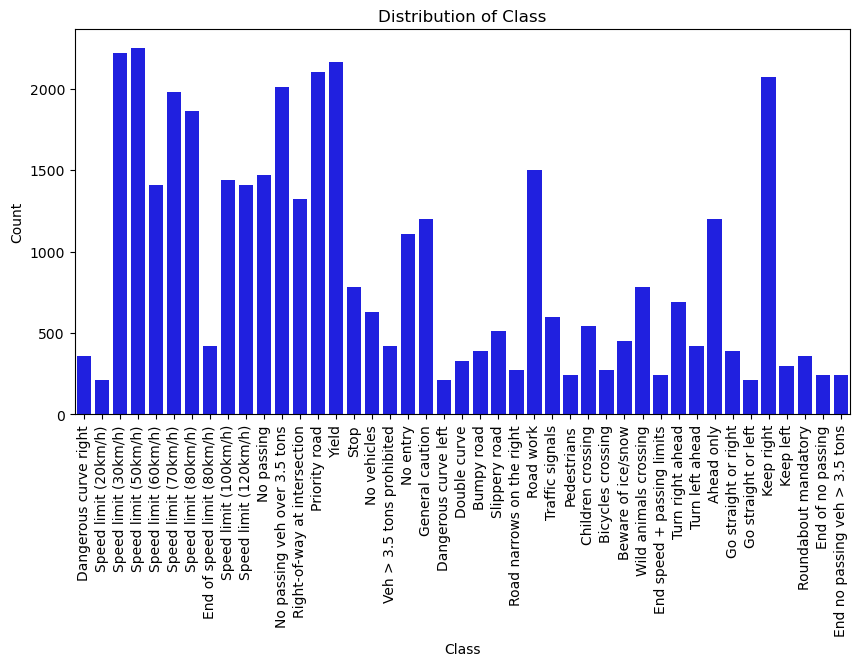

In [4]:
# Train 데이터셋 CSV 파일 경로
train_csv_path = os.path.join(data_dir, 'Train.csv')

# CSV 파일 불러오기
train_data = pd.read_csv(train_csv_path)

# ClassID에 대응하는 클래스 이름 매핑
train_data['Class'] = train_data['ClassId'].map(classes)

# ClassID의 분포 그래프 표시
plt.figure(figsize=(10, 5))
sns.countplot(data=train_data, x='Class' , color = 'blue')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Class')

plt.show()

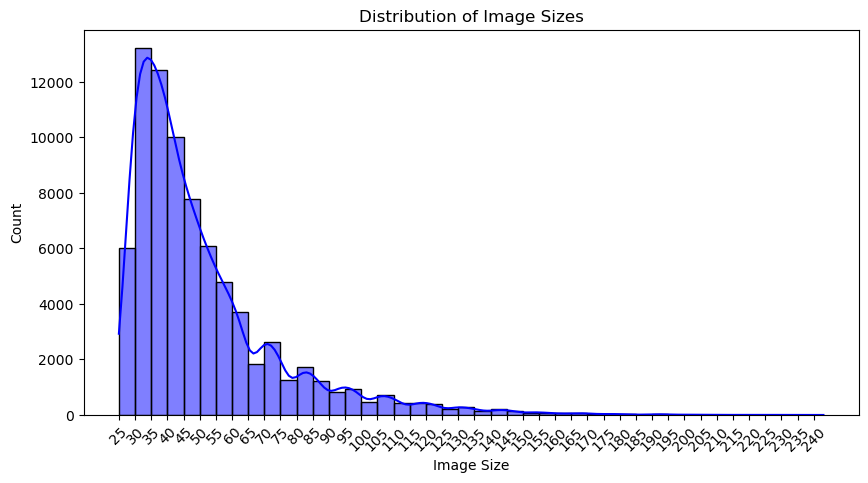

In [5]:
# Width와 Height 컬럼 값 추출
width_values = train_data['Width'].values
height_values = train_data['Height'].values

# Width와 Height 값을 모두 취합
sizes = []
for width, height in zip(width_values, height_values):
    sizes.append(width)
    sizes.append(height)

# 값이 존재하는 구간 추출
filtered_sizes = [size for size in sizes if size > 0]

# 이미지 크기를 히스토그램으로 시각화
plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_sizes, bins=range(min(filtered_sizes), max(filtered_sizes) + 1, 5), kde=True, color = 'blue')
plt.xlabel('Image Size')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Distribution of Image Sizes')

plt.xticks(range(min(filtered_sizes), max(filtered_sizes) + 1, 5))
plt.show()

In [6]:
from scipy.stats import mode

mean_size = np.mean(sizes)
print("Average Image Size:", mean_size)
median_size = np.median(filtered_sizes)
print("Median Image Size:", median_size)
mode_size = mode(filtered_sizes).mode[0]
print("Mode Size:", mode_size)

# 이미지 크기 설정 
weight = 43
height = 43

Average Image Size: 50.58240454997577
Median Image Size: 43.0
Mode Size: 33


C:\Users\TEN\AppData\Local\Temp\ipykernel_20464\1436441503.py:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_size = mode(filtered_sizes).mode[0]


In [7]:
# Train 데이터셋 불러오기
train_images = []
train_labels = []
train_data = pd.read_csv(data_dir+ '/Train.csv')
labels = train_data["ClassId"].values
imgs = train_data["Path"].values

for label, img_path in zip(labels, imgs):
    image_path = data_dir + '/' + img_path
    image = load_img(image_path, target_size=(weight, height))
    image = img_to_array(image)
    train_images.append(image)
    train_labels.append(label)

# 이미지와 레이블을 NumPy 배열로 변환
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images = train_images.astype('float32') / 255.0

In [8]:
# Test 데이터셋 불러오기
test_images = []
test_labels = []
test_data = pd.read_csv(data_dir+ '/Test.csv')
labels = test_data["ClassId"].values
imgs = test_data["Path"].values

for label, img_path in zip(labels, imgs):
    image_path = data_dir + '/' + img_path
    image = load_img(image_path, target_size=(weight, height))
    image = img_to_array(image)
    test_images.append(image)
    test_labels.append(label)

# 이미지와 레이블을 NumPy 배열로 변환
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images = test_images.astype('float32') / 255.0

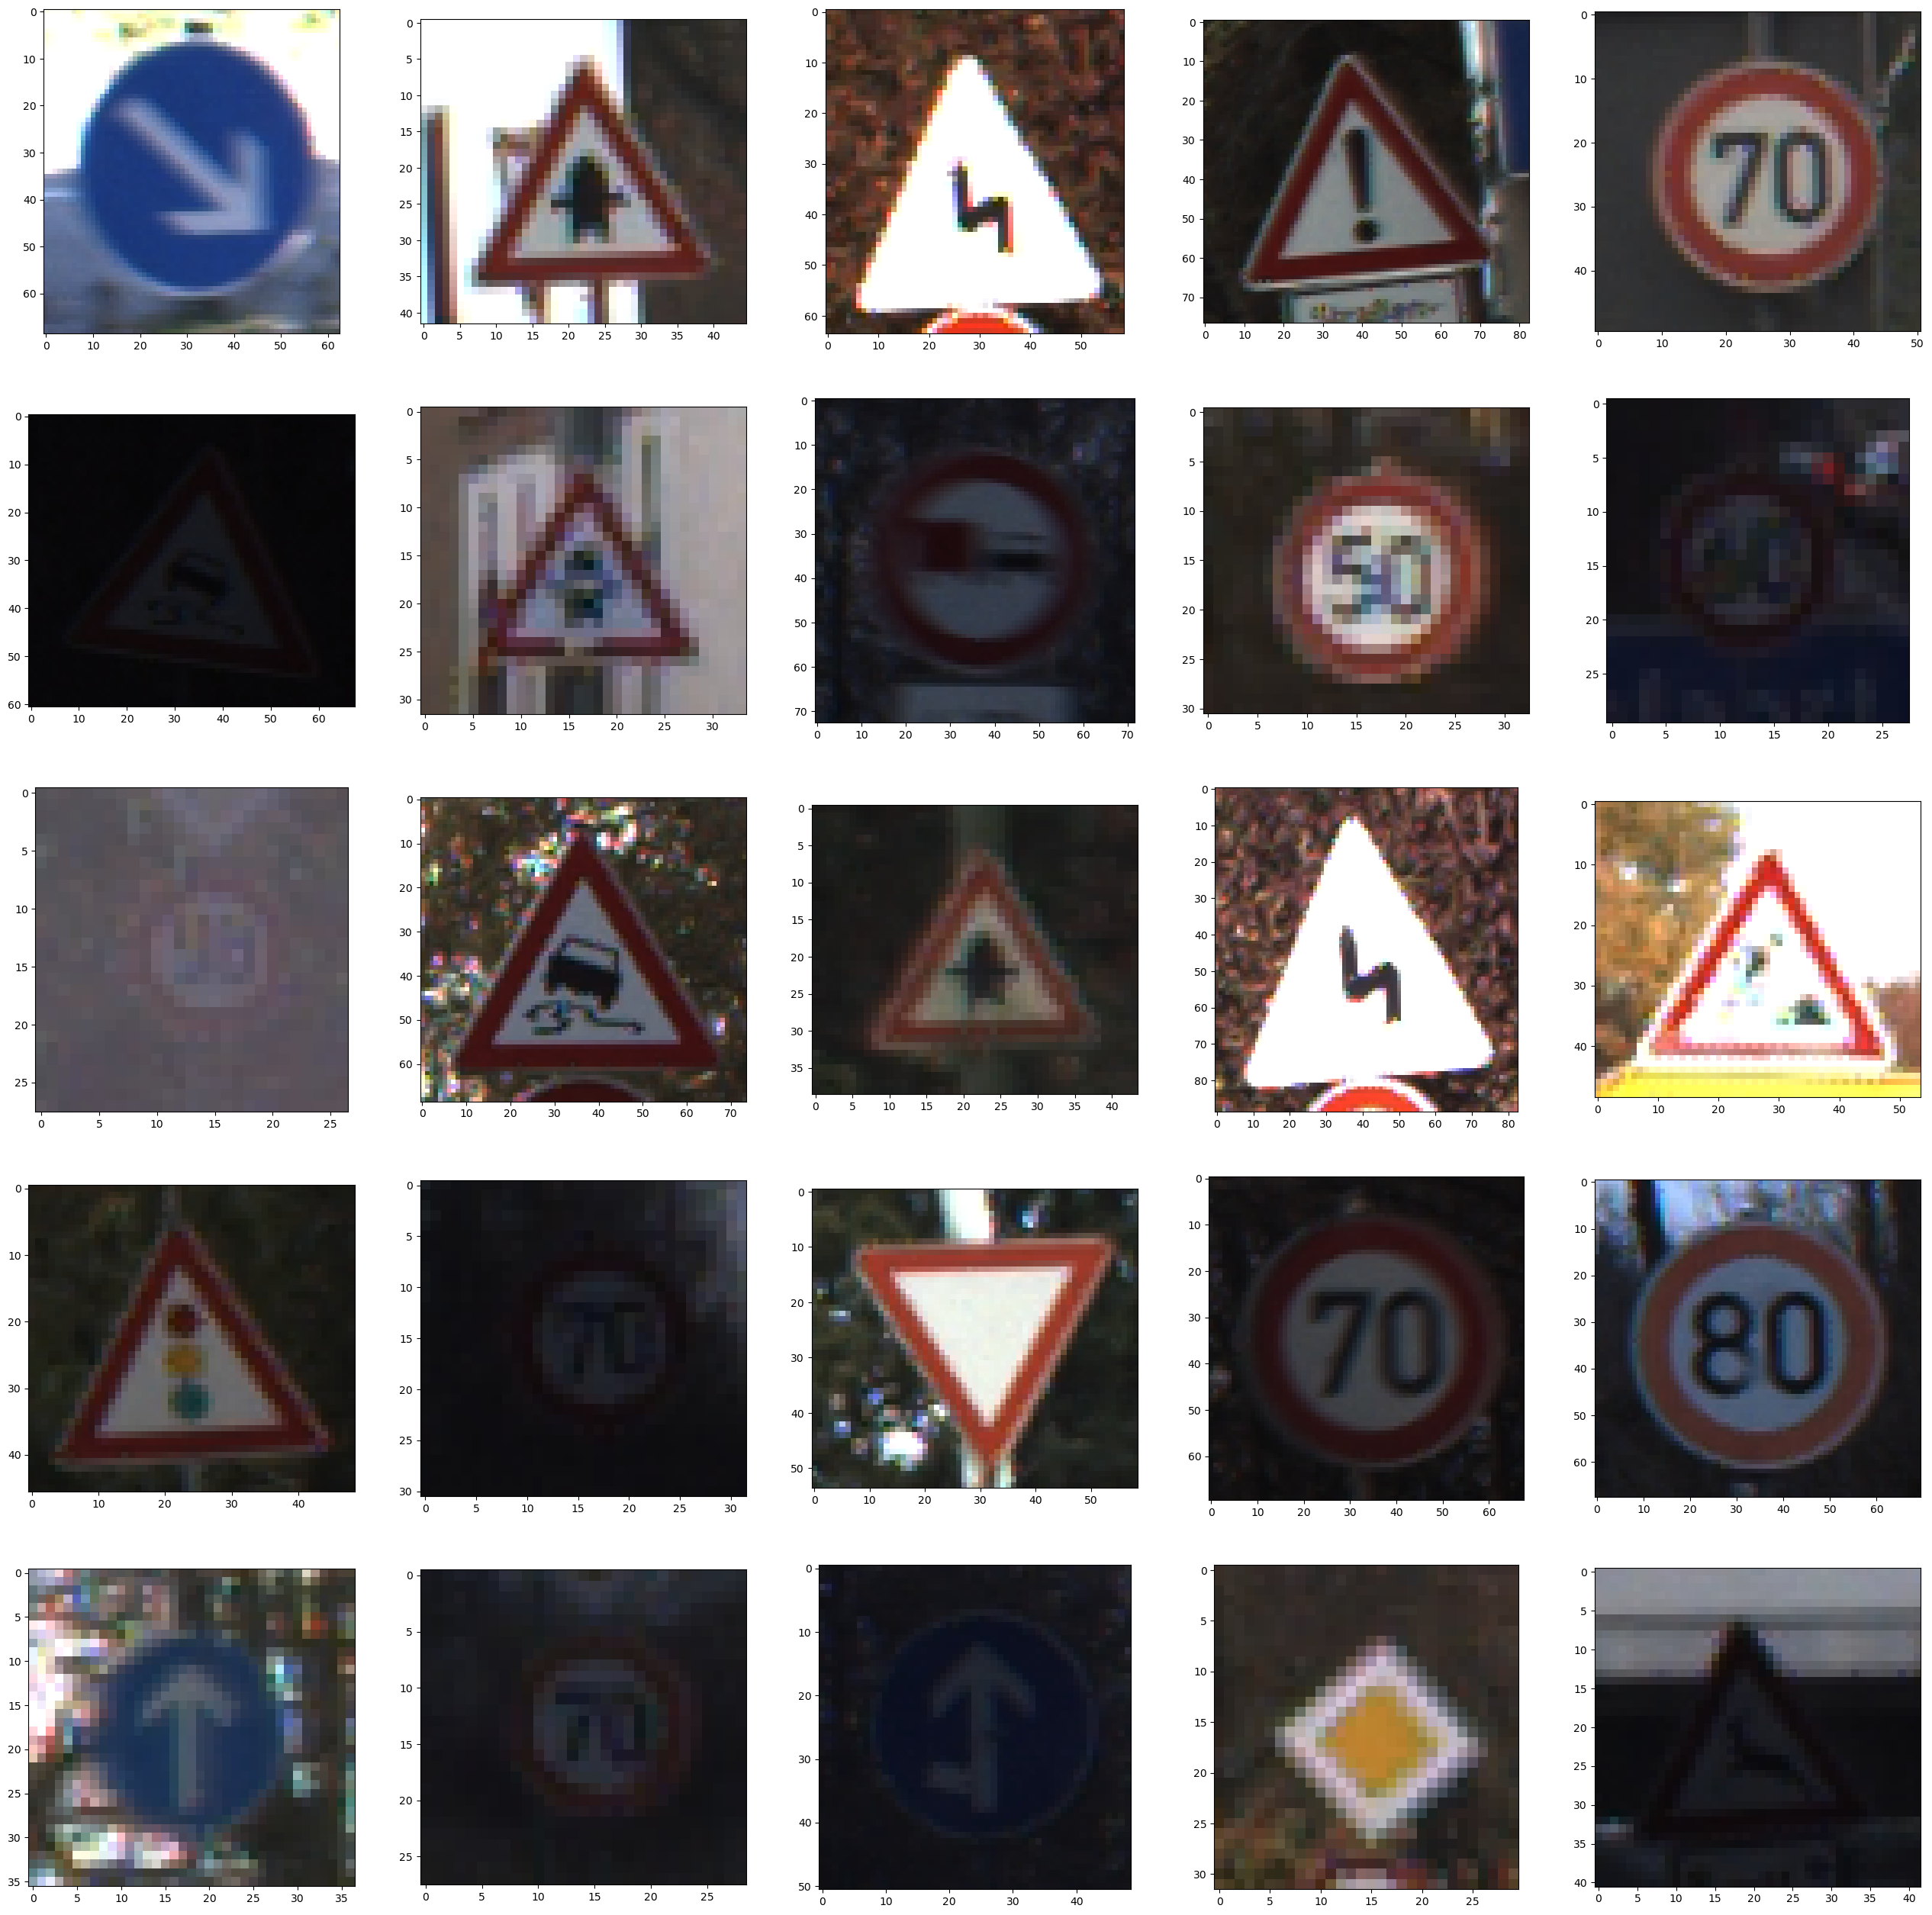

In [9]:
#Test 데이터셋 25개 보여주기
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(32,32))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)

In [10]:
# 클래스 레이블을 categorical 형식으로 변환
train_labels = to_categorical(train_labels, num_classes)
test_labels_encoded = to_categorical(test_labels)

In [11]:
# VGGNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(weight, height, 3))

# 새로운 모델 구성 (마지막 레이어 수정)
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 기존 가중치 동결
base_model.trainable = False

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
#모델 학습
model.fit(train_images, train_labels, batch_size=64, epochs=30)

Epoch 1/30
613/613 [==============================] - 57s 93ms/step - loss: 2.0460 - accuracy: 0.4073
Epoch 2/30
613/613 [==============================] - 55s 90ms/step - loss: 1.4032 - accuracy: 0.5720
Epoch 3/30
613/613 [==============================] - 52s 86ms/step - loss: 1.1866 - accuracy: 0.6337
Epoch 4/30
613/613 [==============================] - 55s 90ms/step - loss: 1.0513 - accuracy: 0.6727
Epoch 5/30
613/613 [==============================] - 57s 93ms/step - loss: 0.9546 - accuracy: 0.7003
Epoch 6/30
613/613 [==============================] - 55s 90ms/step - loss: 0.8794 - accuracy: 0.7229
Epoch 7/30
613/613 [==============================] - 54s 89ms/step - loss: 0.8191 - accuracy: 0.7424
Epoch 8/30
613/613 [==============================] - 54s 88ms/step - loss: 0.7680 - accuracy: 0.7564
Epoch 9/30
613/613 [==============================] - 54s 88ms/step - loss: 0.7237 - accuracy: 0.7718
Epoch 10/30
613/613 [==============================] - 55s 89ms/step - loss: 0.682

In [13]:
# 훈련 데이터셋 평가
test_loss, test_acc = model.evaluate(test_images, test_labels_encoded)
print(f'Test accuracy : ',round(test_acc*100, 3),'%')

395/395 [==============================] - 23s 58ms/step - loss: 1.9101 - accuracy: 0.5779
Test accuracy :  57.791 %


In [14]:
# 테스트 데이터셋에서 10개의 이미지를 무작위로 선택
random_indices = random.sample(range(test_images.shape[0]), k=10)
random_images = test_images[random_indices]
random_labels = test_labels_encoded[random_indices]

# 선택된 이미지에 대한 예측값 계산
predictions = model.predict(random_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(random_labels, axis=1)

# 예측값과 실제값 비교 및 라벨 이름 출력
for i in range(10):
    predicted_label = predicted_labels[i]
    true_label = true_labels[i]

    # 예측한 라벨과 실제 라벨의 이름 출력
    predicted_label_name = classes[predicted_label]
    true_label_name = classes[true_label]
    print(f'True Label: {true_label_name} \nPredicted Label: {predicted_label_name}\n')

1/1 [==============================] - 0s 126ms/step
True Label: Speed limit (70km/h) 
Predicted Label: Speed limit (50km/h)

True Label: No passing veh over 3.5 tons 
Predicted Label: No passing veh over 3.5 tons

True Label: No passing 
Predicted Label: No passing

True Label: No passing veh over 3.5 tons 
Predicted Label: No passing veh over 3.5 tons

True Label: No entry 
Predicted Label: No entry

True Label: No vehicles 
Predicted Label: No vehicles

True Label: Speed limit (70km/h) 
Predicted Label: Speed limit (50km/h)

True Label: Speed limit (100km/h) 
Predicted Label: Speed limit (100km/h)

True Label: Speed limit (120km/h) 
Predicted Label: Speed limit (80km/h)

True Label: Speed limit (120km/h) 
Predicted Label: Speed limit (120km/h)

